### To implement AND function using Perceptron.

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.random.rand(X.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

    def predict(self, x):
        activation = np.dot(x, self.weights) + self.bias
        return 1 if activation >= 0 else 0


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])


perceptron = Perceptron()
perceptron.fit(X, y)


print("Predictions:")
print(perceptron.predict([0, 0]))  
print(perceptron.predict([0, 1])) 
print(perceptron.predict([1, 0])) 
print(perceptron.predict([1, 1])) 

Predictions:
0
0
0
1


### NOR Gate implementation with binary input and bipolar target using adaline.

In [2]:
arr = [[1, 1], [1, -1], [-1, 1], [-1, -1]]


t = [-1, 1, -1, -1]
w1 = 0.2
w2 = 0.2
b = 0.2



for i in range(5):
    avg = 0
    print("EPOCH", i + 1, "Errors\n")
    for j in range(4):
       
        yi = arr[j][0] * w1 + arr[j][1] * w2 + 1 * b
        dif = t[j] - yi

        4  
        w1 += 0.2 * dif * arr[j][0]
        w2 += 0.2 * dif * arr[j][1]
        b += 0.2 * dif * 1
        err = dif * dif
        print(err, end=" ")
        avg += err
    print("\n\nTotal Mean Error :", avg, "\n\n")


EPOCH 1 Errors

2.5600000000000005 1.2544000000000002 0.4303359999999999 1.4708838400000002 

Total Mean Error : 5.7156198400000005 


EPOCH 2 Errors

0.9513271295999998 0.5691676426240001 0.1063532108185601 0.8033574186123268 

Total Mean Error : 2.4302054016548866 


EPOCH 3 Errors

0.617033023426134 0.494715001503786 0.3690351509031695 0.6049607329626666 

Total Mean Error : 2.085743908795756 


EPOCH 4 Errors

0.5357255178865599 0.49672250781889216 0.47045212857862795 0.5411655402267711 

Total Mean Error : 2.0440656945108513 


EPOCH 5 Errors

0.5155772952921179 0.5038565434215028 0.4999325560892935 0.5201882406262993 

Total Mean Error : 2.0395546354292136 




#### XOR Gate implementation with bipolar input target using madaline. 

In [2]:
def perceptron_and(x1, x2):
    w1, w2, b = 1, 1, -1.5
    z = w1 * x1 + w2 * x2 + b

    return 1 if z > 0 else 0


inputs = [(0, 0),
          (0, 1),
          (1, 0),
          (1, 1)]
outputs = [perceptron_and(x1, x2) for x1, x2 in inputs]

print("AND Function output is: ")
for i, o in zip(inputs, outputs):
    print(f"Input: {i}, Output: {o}")

AND Function output is: 
Input: (0, 0), Output: 0
Input: (0, 1), Output: 0
Input: (1, 0), Output: 0
Input: (1, 1), Output: 1


#### Create a perceptron with appropriate no. of inputs and outputs. Train it using fixed increment learning algorithm until no change in weight is required. Output the final weights4. 

In [4]:
import numpy as np

# Define the AND function dataset
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
targets = np.array([0, 0, 0, 1])  # Corresponding outputs

# Initialize weights and bias
weights = np.zeros(2)  # Two inputs, so two weights
bias = 0.0
learning_rate = 0.1  # Fixed increment

# Activation function (Step function)
def activation_function(z):
    return 1 if z > 0 else 0

# Training the perceptron
def train_perceptron(inputs, targets, weights, bias, learning_rate):
    epochs = 0
    while True:
        weights_updated = False
        for x, target in zip(inputs, targets):
            # Compute the perceptron output
            z = np.dot(weights, x) + bias
            y = activation_function(z)
            
            # Calculate the error
            error = target - y
            
            # Update weights and bias if there's an error
            if error != 0:
                weights += learning_rate * error * x
                bias += learning_rate * error
                weights_updated = True
        
        # Increment the epoch counter
        epochs += 1
        
        # Stop if no weights were updated in this epoch
        if not weights_updated:
            break
    
    return weights, bias, epochs

# Train the perceptron
final_weights, final_bias, epochs = train_perceptron(inputs, targets, weights, bias, learning_rate)

# Output the results
print("Training completed!")
print(f"Final weights: {final_weights}")
print(f"Final bias: {final_bias}")
print(f"Total epochs: {epochs}")

Training completed!
Final weights: [0.2 0.1]
Final bias: -0.2
Total epochs: 6


#### Using back-propagation network, find the new weights. It is presented with the input pattern [0, 1] and the target output is 1. Use a learning rate a = 0.25 and binar sigmoidal activation function.

In [5]:
import numpy as np

def sigmoid(x):
    """Binary sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of the binary sigmoid function."""
    return x * (1 - x)

# Initial weights
w1, w2, w3 = 0.1, -0.2, 0.4  # Weights for input to hidden and hidden to output

# Input pattern and target
x = np.array([0, 1])  # Input pattern [x1, x2]
target = 1  # Target output
a = 0.25  # Learning rate

# Forward pass
# Compute hidden layer activation
h_net = w1 * x[0] + w2 * x[1]  # Weighted input to the hidden layer
h = sigmoid(h_net)  # Activation of the hidden layer

# Compute output layer activation
o_net = h * w3  # Weighted input to the output layer
o = sigmoid(o_net)  # Activation of the output layer

# Compute error
error = target - o

# Backpropagation
# Gradient for output layer
delta_o = error * sigmoid_derivative(o)

# Gradient for hidden layer
delta_h = delta_o * w3 * sigmoid_derivative(h)

# Update weights
w3_new = w3 + a * delta_o * h  # Update weight from hidden to output
w1_new = w1 + a * delta_h * x[0]  # Update weight from input[0] to hidden
w2_new = w2 + a * delta_h * x[1]  # Update weight from input[1] to hidden

# Print updated weights
print(f"Updated weights:")
print(f"w1: {w1_new}")
print(f"w2: {w2_new}")
print(f"w3: {w3_new}")


Updated weights:
w1: 0.1
w2: -0.19720655631475034
w3: 0.4127013048433877


#### Program to perform Union, Intersection and Complement oprations in fuzzy set.

In [6]:
import numpy as np

def union_fuzzy(set_a, set_b):
    """Perform union operation on two fuzzy sets."""
    return np.maximum(set_a, set_b)

def intersection_fuzzy(set_a, set_b):
    """Perform intersection operation on two fuzzy sets."""
    return np.minimum(set_a, set_b)

def complement_fuzzy(fuzzy_set):
    """Perform complement operation on a fuzzy set."""
    return 1 - fuzzy_set

# Example usage
if __name__ == "__main__":
    # Define two fuzzy sets
    set_a = np.array([0.2, 0.5, 0.8, 0.9])
    set_b = np.array([0.4, 0.7, 0.6, 0.3])

    # Perform union
    union_result = union_fuzzy(set_a, set_b)
    print(f"Union: {union_result}")

    # Perform intersection
    intersection_result = intersection_fuzzy(set_a, set_b)
    print(f"Intersection: {intersection_result}")

    # Perform complement
    complement_result_a = complement_fuzzy(set_a)
    print(f"Complement of Set A: {complement_result_a}")

    complement_result_b = complement_fuzzy(set_b)
    print(f"Complement of Set B: {complement_result_b}")


Union: [0.4 0.7 0.8 0.9]
Intersection: [0.2 0.5 0.6 0.3]
Complement of Set A: [0.8 0.5 0.2 0.1]
Complement of Set B: [0.6 0.3 0.4 0.7]


#### Write a Python program that asks the user to enter two fuzzy sets and computes the resultant fuzzy relation for value up to 10 that are greater than 6.

In [4]:
def input_fuzzy_set(name):
    fuzzy_set = {}
    print(f"Enter the fuzzy set '{name}' (enter 'done' to finish):")
    while True:
        value = input("Enter value (0-10) or 'done': ")
        if value.lower() == 'done':
            break
        try:
            value = float(value)
            if 0 <= value <= 10:
                membership = float(input(f"Enter membership value for {value} (0-1): "))
                if 0 <= membership <= 1:
                    fuzzy_set[value] = membership
                else:
                    print("Membership value must be between 0 and 1.")
            else:
                print("Value must be between 0 and 10.")
        except ValueError:
            print("Invalid input. Please enter a numeric value.")
    return fuzzy_set

def compute_fuzzy_relation(set1, set2):
    resultant_set = {}
    for value1, membership1 in set1.items():
        for value2, membership2 in set2.items():

            relation_value = min(membership1, membership2)
            resultant_set[(value1, value2)] = relation_value
    return resultant_set

def filter_relation(relation):
    filtered_relation = {k: v for k, v in relation.items() if k[0] > 6 or k[1] > 6}
    return filtered_relation

def main():

    fuzzy_set1 = input_fuzzy_set('Fuzzy Set 1')
    fuzzy_set2 = input_fuzzy_set('Fuzzy Set 2')

    fuzzy_relation = compute_fuzzy_relation(fuzzy_set1, fuzzy_set2)


    filtered_relation = filter_relation(fuzzy_relation)


    print("\nResultant Fuzzy Relation (Filtered for values greater than 6):")
    for key, value in filtered_relation.items():
        print(f"Relation {key}: Membership = {value:.2f}")

if __name__ == "__main__":
    main()


Enter the fuzzy set 'Fuzzy Set 1' (enter 'done' to finish):


Enter value (0-10) or 'done':  5
Enter membership value for 5.0 (0-1):  0.5
Enter value (0-10) or 'done':  2
Enter membership value for 2.0 (0-1):  1
Enter value (0-10) or 'done':  done


Enter the fuzzy set 'Fuzzy Set 2' (enter 'done' to finish):


Enter value (0-10) or 'done':  3
Enter membership value for 3.0 (0-1):  0.33
Enter value (0-10) or 'done':  8
Enter membership value for 8.0 (0-1):  0.11
Enter value (0-10) or 'done':  done



Resultant Fuzzy Relation (Filtered for values greater than 6):
Relation (5.0, 8.0): Membership = 0.11
Relation (2.0, 8.0): Membership = 0.11


#### Create two matrices of dimension 3x3 and 3x4 respectively which contain random number as there elements. Compute composition of these two fuzzy relation using both max-min and max-product composition.

In [1]:
import numpy as np

def max_min_composition(A, B):
    rows_A, cols_A = A.shape
    rows_B, cols_B = B.shape
    result = np.zeros((rows_A, cols_B))

    for i in range(rows_A):
        for j in range(cols_B):
            result[i, j] = np.max([np.min([A[i, k], B[k, j]]) for k in range(cols_A)])

    return result

def max_product_composition(A, B):
    rows_A, cols_A = A.shape
    rows_B, cols_B = B.shape
    result = np.zeros((rows_A, cols_B))

    for i in range(rows_A):
        for j in range(cols_B):
            result[i, j] = np.max([A[i, k] * B[k, j] for k in range(cols_A)])

    return result

def main():
    
    A = np.random.rand(3, 3)  # Matrix of size 3x3
    B = np.random.rand(3, 4)  # Matrix of size 3x4

    print("Matrix A (3x3):")
    print(A)

    print("\nMatrix B (3x4):")
    print(B)

    # Max-Min Composition
    max_min_result = max_min_composition(A, B)
    print("\nMax-Min Composition Result (3x4):")
    print(max_min_result)

    # Max-Product Composition
    max_product_result = max_product_composition(A, B)
    print("\nMax-Product Composition Result (3x4):")
    print(max_product_result)

if __name__ == "__main__":
    main()


Matrix A (3x3):
[[0.69405787 0.63122429 0.26809863]
 [0.99416667 0.53073163 0.34424275]
 [0.7460188  0.08708139 0.40082033]]

Matrix B (3x4):
[[0.95271883 0.88198916 0.41791891 0.30148356]
 [0.48428264 0.84518975 0.68719251 0.97270437]
 [0.22758597 0.43433496 0.44732473 0.96969735]]

Max-Min Composition Result (3x4):
[[0.69405787 0.69405787 0.63122429 0.63122429]
 [0.95271883 0.88198916 0.53073163 0.53073163]
 [0.7460188  0.7460188  0.41791891 0.40082033]]

Max-Product Composition Result (3x4):
[[0.66124201 0.61215152 0.4337726  0.61399462]
 [0.94716131 0.87684422 0.41548105 0.51624497]
 [0.71074616 0.65798049 0.31177536 0.38867441]]


#### Write a program that creates two random fuzzy sets of the dimension say n and m (to be defined by the user) Complete the fuzzy relation indexed by the Caresian product of the sets.

In [8]:
import numpy as np

def create_random_fuzzy_set(size):
    """Create a random fuzzy set with the given size."""
    return np.random.rand(size)

def create_fuzzy_relation(set_a, set_b):
    """Create a fuzzy relation based on the Cartesian product of two sets."""
    relation = np.zeros((len(set_a), len(set_b)))
    for i in range(len(set_a)):
        for j in range(len(set_b)):
            relation[i, j] = min(set_a[i], set_b[j])  # Using min as the fuzzy relation rule
    return relation

if __name__ == "__main__":
    # Input dimensions for the fuzzy sets
    n = int(input("Enter the size of the first fuzzy set (n): "))
    m = int(input("Enter the size of the second fuzzy set (m): "))

    # Generate random fuzzy sets
    set_a = create_random_fuzzy_set(n)
    set_b = create_random_fuzzy_set(m)

    print(f"Fuzzy Set A: {set_a}")
    print(f"Fuzzy Set B: {set_b}")

    # Generate fuzzy relation
    fuzzy_relation = create_fuzzy_relation(set_a, set_b)

    print("Fuzzy Relation (Cartesian Product):")
    print(fuzzy_relation)


Enter the size of the first fuzzy set (n):  3
Enter the size of the second fuzzy set (m):  4


Fuzzy Set A: [0.79831913 0.26078695 0.85017132]
Fuzzy Set B: [0.74494831 0.57041649 0.86728889 0.83856423]
Fuzzy Relation (Cartesian Product):
[[0.74494831 0.57041649 0.79831913 0.79831913]
 [0.26078695 0.26078695 0.26078695 0.26078695]
 [0.74494831 0.57041649 0.85017132 0.83856423]]


#### Genetic neuro hybrid systems, Genetic-Fuzzy rule based system.

In [9]:
import numpy as np
import random

# Genetic Algorithm for optimizing a neural network
class GeneticNeuroHybrid:
    def __init__(self, population_size, input_size, hidden_size, output_size):
        self.population_size = population_size
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.population = self.initialize_population()

    def initialize_population(self):
        """Initialize a population of neural network weights."""
        population = []
        for _ in range(self.population_size):
            individual = {
                "weights_input_hidden": np.random.uniform(-1, 1, (self.input_size, self.hidden_size)),
                "weights_hidden_output": np.random.uniform(-1, 1, (self.hidden_size, self.output_size))
            }
            population.append(individual)
        return population

    def fitness(self, individual, X, y):
        """Evaluate the fitness of an individual using Mean Squared Error (MSE)."""
        weights_input_hidden = individual["weights_input_hidden"]
        weights_hidden_output = individual["weights_hidden_output"]

        hidden_layer = np.dot(X, weights_input_hidden)
        hidden_layer_activation = self.sigmoid(hidden_layer)
        output_layer = np.dot(hidden_layer_activation, weights_hidden_output)
        predictions = self.sigmoid(output_layer)

        mse = np.mean((y - predictions) ** 2)
        return 1 / (1 + mse)  # Higher fitness for lower MSE

    def selection(self):
        """Select individuals based on their fitness (roulette wheel selection)."""
        fitness_scores = [self.fitness(ind, X, y) for ind in self.population]
        total_fitness = sum(fitness_scores)
        probabilities = [score / total_fitness for score in fitness_scores]
        selected = random.choices(self.population, weights=probabilities, k=2)
        return selected

    def crossover(self, parent1, parent2):
        """Perform single-point crossover between two parents."""
        child1, child2 = {}, {}

        for key in parent1.keys():
            point = random.randint(0, parent1[key].size - 1)
            flat1, flat2 = parent1[key].flatten(), parent2[key].flatten()
            
            new_flat1 = np.concatenate([flat1[:point], flat2[point:]])
            new_flat2 = np.concatenate([flat2[:point], flat1[point:]])
            
            child1[key] = new_flat1.reshape(parent1[key].shape)
            child2[key] = new_flat2.reshape(parent2[key].shape)

        return child1, child2

    def mutation(self, individual, mutation_rate=0.01):
        """Perform mutation on an individual's weights."""
        for key in individual.keys():
            if random.random() < mutation_rate:
                mutation_matrix = np.random.uniform(-0.5, 0.5, individual[key].shape)
                individual[key] += mutation_matrix

    def sigmoid(self, x):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-x))

    def evolve(self, X, y, generations):
        """Evolve the population over a number of generations."""
        for _ in range(generations):
            new_population = []
            for _ in range(self.population_size // 2):
                parent1, parent2 = self.selection()
                child1, child2 = self.crossover(parent1, parent2)
                self.mutation(child1)
                self.mutation(child2)
                new_population.extend([child1, child2])

            self.population = new_population

        # Return the best individual in the population
        fitness_scores = [self.fitness(ind, X, y) for ind in self.population]
        best_index = np.argmax(fitness_scores)
        return self.population[best_index]

# Example usage
if __name__ == "__main__":
    # Dataset
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])  # XOR problem

    # Parameters
    population_size = 10
    input_size = 2
    hidden_size = 3
    output_size = 1
    generations = 50

    # Genetic Neuro Hybrid System
    gnh = GeneticNeuroHybrid(population_size, input_size, hidden_size, output_size)
    best_individual = gnh.evolve(X, y, generations)

    print("Best individual's weights:")
    print("Input to Hidden Weights:", best_individual["weights_input_hidden"])
    print("Hidden to Output Weights:", best_individual["weights_hidden_output"])

Best individual's weights:
Input to Hidden Weights: [[-0.30536734  0.44327772  0.11794367]
 [ 0.46797606 -0.17881231  0.97679617]]
Hidden to Output Weights: [[-0.83937369]
 [-0.93260607]
 [ 0.80643615]]


#### Consider a set P= {p1, p2, p3, p4, p5} of five varities of plants. Set D= {D1, D2, D3, D4, D5} of the various diseases affecting the plants and S = {s1, s2, s3, s4, s5} be the common symptoms. Let R=P X D & Q=D X S

In [10]:
import numpy as np

# Define the sets
plants = ["p1", "p2", "p3", "p4", "p5"]  # Set P

diseases = ["D1", "D2", "D3", "D4", "D5"]  # Set D

symptoms = ["s1", "s2", "s3", "s4", "s5"]  # Set S

# Cartesian Products
relation_R = [(p, d) for p in plants for d in diseases]  # R = P x D
relation_Q = [(d, s) for d in diseases for s in symptoms]  # Q = D x S

# Display the Cartesian Products
print("Relation R (P x D):")
for pair in relation_R:
    print(pair)

print("\nRelation Q (D x S):")
for pair in relation_Q:
    print(pair)

# Optionally, you can represent these relations as matrices
# Create random association strengths for demonstration (values between 0 and 1)
R_matrix = np.random.rand(len(plants), len(diseases))
Q_matrix = np.random.rand(len(diseases), len(symptoms))

print("\nMatrix representation of R (P x D):")
print(R_matrix)

print("\nMatrix representation of Q (D x S):")
print(Q_matrix)


Relation R (P x D):
('p1', 'D1')
('p1', 'D2')
('p1', 'D3')
('p1', 'D4')
('p1', 'D5')
('p2', 'D1')
('p2', 'D2')
('p2', 'D3')
('p2', 'D4')
('p2', 'D5')
('p3', 'D1')
('p3', 'D2')
('p3', 'D3')
('p3', 'D4')
('p3', 'D5')
('p4', 'D1')
('p4', 'D2')
('p4', 'D3')
('p4', 'D4')
('p4', 'D5')
('p5', 'D1')
('p5', 'D2')
('p5', 'D3')
('p5', 'D4')
('p5', 'D5')

Relation Q (D x S):
('D1', 's1')
('D1', 's2')
('D1', 's3')
('D1', 's4')
('D1', 's5')
('D2', 's1')
('D2', 's2')
('D2', 's3')
('D2', 's4')
('D2', 's5')
('D3', 's1')
('D3', 's2')
('D3', 's3')
('D3', 's4')
('D3', 's5')
('D4', 's1')
('D4', 's2')
('D4', 's3')
('D4', 's4')
('D4', 's5')
('D5', 's1')
('D5', 's2')
('D5', 's3')
('D5', 's4')
('D5', 's5')

Matrix representation of R (P x D):
[[0.63141205 0.53100343 0.41948555 0.30923465 0.14771237]
 [0.20987904 0.28913537 0.27679495 0.63313684 0.65172458]
 [0.2502586  0.66623318 0.12418545 0.3269911  0.92434544]
 [0.75147137 0.64903353 0.25468653 0.98084679 0.32216596]
 [0.69684378 0.74850022 0.43791614 0.796

#### Train an autocorrelator network for the pattern [1,-1,1,1] and also test the new weight for one missing and one mistake entry in the test vector respectively

In [11]:
import numpy as np

# Step 1: Define the pattern
pattern = np.array([1, -1, 1, 1])

# Step 2: Train the network using Hebbian learning rule
def train_autocorrelator(pattern):
    # Hebbian learning: W = p * p^T (outer product of the pattern with itself)
    weight_matrix = np.outer(pattern, pattern)
    return weight_matrix

# Step 3: Define the function for testing the network
def test_autocorrelator(weight_matrix, test_input):
    # Apply the weight matrix to the test input and apply a threshold to recall the pattern
    output = np.sign(np.dot(weight_matrix, test_input))  # Use sign to threshold the output
    return output

# Step 4: Train the autocorrelator network
weight_matrix = train_autocorrelator(pattern)

# Step 5: Test the network with missing and incorrect entries

# Test 1: One missing entry (e.g., second entry is missing, set to zero)
test_input_missing = np.array([1, 0, 1, 1])  # Missing entry (second position set to 0)
output_missing = test_autocorrelator(weight_matrix, test_input_missing)

# Test 2: One mistake (e.g., second entry is incorrect, set to wrong value)
test_input_mistake = np.array([1, 1, 1, 1])  # Mistake in second position (should be -1)
output_mistake = test_autocorrelator(weight_matrix, test_input_mistake)

# Step 6: Print the results
print("Output for missing entry test:", output_missing)
print("Output for mistake entry test:", output_mistake)


Output for missing entry test: [ 1 -1  1  1]
Output for mistake entry test: [ 1 -1  1  1]


#### Train the autocorrelator by given patterns: A1=(-1,1,-1,1), A2=(1,1,1,-1),A3=(-1, -1, - 1, 1). Test it using patterns: Ax=(-1,1,-1,1), Ay=(1,1,1,1), Az=(-1,-1,-1,-1).

In [12]:
import numpy as np

# Step 1: Define the training patterns
A1 = np.array([-1, 1, -1, 1])
A2 = np.array([1, 1, 1, -1])
A3 = np.array([-1, -1, -1, 1])

# Combine the training patterns into a list for easier processing
training_patterns = [A1, A2, A3]

# Step 2: Train the autocorrelator using the patterns
def train_autocorrelator(patterns):
    # Initialize the weight matrix as a zero matrix
    weight_matrix = np.zeros((len(patterns[0]), len(patterns[0])))
    
    # Apply the Hebbian learning rule: W = sum(p_i * p_i^T)
    for pattern in patterns:
        weight_matrix += np.outer(pattern, pattern)
        
    return weight_matrix

# Step 3: Define the function for testing the network
def test_autocorrelator(weight_matrix, test_input):
    # Apply the weight matrix to the test input and apply a threshold to recall the pattern
    output = np.sign(np.dot(weight_matrix, test_input))  # Use sign to threshold the output
    return output

# Step 4: Train the autocorrelator network with the training patterns
weight_matrix = train_autocorrelator(training_patterns)

# Step 5: Test the network with the provided test patterns
Ax = np.array([-1, 1, -1, 1])
Ay = np.array([1, 1, 1, 1])
Az = np.array([-1, -1, -1, -1])

output_Ax = test_autocorrelator(weight_matrix, Ax)
output_Ay = test_autocorrelator(weight_matrix, Ay)
output_Az = test_autocorrelator(weight_matrix, Az)

# Step 6: Print the results
print("Output for Ax test pattern (-1, 1, -1, 1):", output_Ax)
print("Output for Ay test pattern (1, 1, 1, 1):", output_Ay)
print("Output for Az test pattern (-1, -1, -1, -1):", output_Az)


Output for Ax test pattern (-1, 1, -1, 1): [-1.  0. -1.  1.]
Output for Ay test pattern (1, 1, 1, 1): [ 1.  1.  1. -1.]
Output for Az test pattern (-1, -1, -1, -1): [-1. -1. -1.  1.]


#### Write a program in MATLAB to implement De-Morgan's Law

In [18]:
# MATLAB program

'''% Define the logical values for A and B
A = [true, true, false, false]; % A: true, true, false, false
B = [true, false, true, false]; % B: true, false, true, false

% Display the results for De Morgan's Law (1): ¬(A ∧ B) = ¬A ∨ ¬B
disp('De Morgan''s Law 1: ¬(A ∧ B) = ¬A ∨ ¬B');
for i = 1:length(A)
    % Left side of the equation: ¬(A ∧ B)
    left_side_1 = ~(A(i) & B(i));
    
    % Right side of the equation: ¬A ∨ ¬B
    right_side_1 = ~A(i) | ~B(i);
    
    fprintf('A = %d, B = %d: Left side = %d, Right side = %d\n', A(i), B(i), left_side_1, right_side_1);
end

disp(' '); % Print a blank line for separation

% Display the results for De Morgan's Law (2): ¬(A ∨ B) = ¬A ∧ ¬B
disp('De Morgan''s Law 2: ¬(A ∨ B) = ¬A ∧ ¬B');
for i = 1:length(A)
    % Left side of the equation: ¬(A ∨ B)
    left_side_2 = ~(A(i) | B(i));
    
    % Right side of the equation: ¬A ∧ ¬B
    right_side_2 = ~A(i) & ~B(i);
    
    fprintf('A = %d, B = %d: Left side = %d, Right side = %d\n', A(i), B(i), left_side_2, right_side_2);
end
'''

"% Define the logical values for A and B\nA = [true, true, false, false]; % A: true, true, false, false\nB = [true, false, true, false]; % B: true, false, true, false\n\n% Display the results for De Morgan's Law (1): ¬(A ∧ B) = ¬A ∨ ¬B\ndisp('De Morgan''s Law 1: ¬(A ∧ B) = ¬A ∨ ¬B');\nfor i = 1:length(A)\n    % Left side of the equation: ¬(A ∧ B)\n    left_side_1 = ~(A(i) & B(i));\n    \n    % Right side of the equation: ¬A ∨ ¬B\n    right_side_1 = ~A(i) | ~B(i);\n    \n    fprintf('A = %d, B = %d: Left side = %d, Right side = %d\n', A(i), B(i), left_side_1, right_side_1);\nend\n\ndisp(' '); % Print a blank line for separation\n\n% Display the results for De Morgan's Law (2): ¬(A ∨ B) = ¬A ∧ ¬B\ndisp('De Morgan''s Law 2: ¬(A ∨ B) = ¬A ∧ ¬B');\nfor i = 1:length(A)\n    % Left side of the equation: ¬(A ∨ B)\n    left_side_2 = ~(A(i) | B(i));\n    \n    % Right side of the equation: ¬A ∧ ¬B\n    right_side_2 = ~A(i) & ~B(i);\n    \n    fprintf('A = %d, B = %d: Left side = %d, Right side =

#### Generate ANDNOT functions using McCulloch-pitts neural net.

In [16]:
import numpy as np

# McCulloch-Pitts Neuron Model
def mcCulloch_pitts(inputs, weights, threshold):
    # Calculate the weighted sum of inputs
    weighted_sum = np.dot(inputs, weights)
    
    # Apply the threshold function (step function)
    if weighted_sum >= threshold:
        return 1  # Neuron fires
    else:
        return 0  # Neuron does not fire

# Define the ANDNOT function
def andnot_function(A, B):
    # Weights and threshold for the ANDNOT operation
    # McCulloch-Pitts for ANDNOT
    weights = np.array([1, 1])   # Both inputs have weight 1
    threshold = 1  # The threshold is 1 to implement the ANDNOT behavior
    
    # Create the input vector [A, B]
    inputs = np.array([A, B])
    
    # Apply the McCulloch-Pitts neuron model
    return mcCulloch_pitts(inputs, weights, threshold)

# Test the ANDNOT function for all combinations of A and B
print("A | B | ANDNOT(A, B)")
for A in [0, 1]:
    for B in [0, 1]:
        result = andnot_function(A, B)
        print(f"{A} | {B} | {result}")


A | B | ANDNOT(A, B)
0 | 0 | 0
0 | 1 | 1
1 | 0 | 1
1 | 1 | 1


#### Binary Step Activation Function

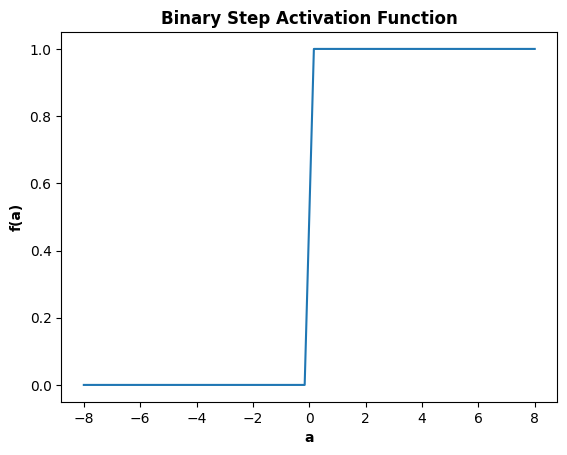

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def binaryStep(a):
    return np.heaviside(a,1)
a = np.linspace(-8, 8)
plt.plot(a, binaryStep(a))
plt.title('Binary Step Activation Function',
fontweight='bold')
plt.xlabel("a", fontweight='bold')
plt.ylabel("f(a)", fontweight='bold')
plt.show()

#### Python Code to Display Linear Activation Function

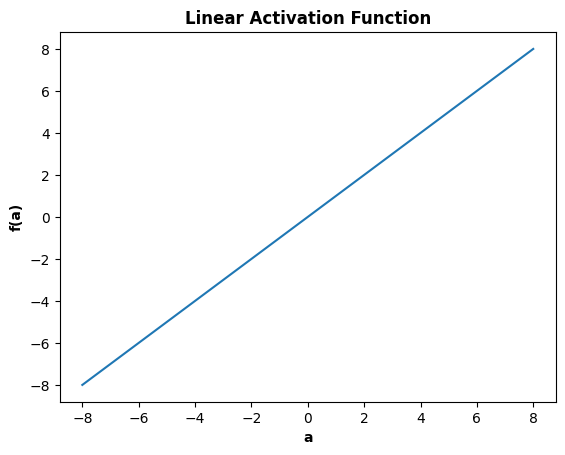

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def linear(a):
    return (a)
a = np.linspace(-8, 8)
plt.plot(a, linear(a))
plt.title('Linear Activation Function', fontweight
='bold')
plt.xlabel("a", fontweight='bold')
plt.ylabel("f(a)", fontweight='bold')
plt.show()

#### Python Code to Display Sigmoid Activation Function

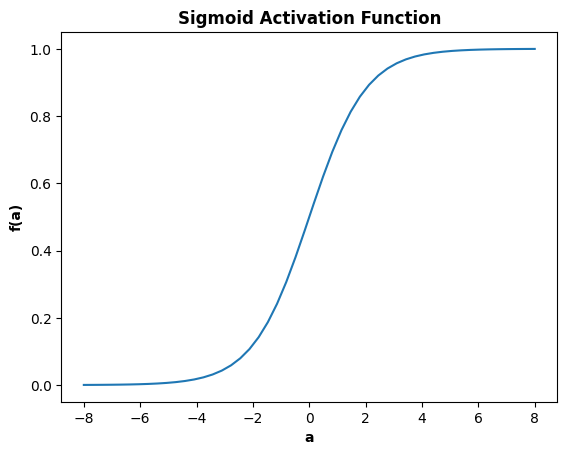

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(a):
    return 1/(1+np.exp(-a))
a = np.linspace(-8, 8)
plt.plot(a, sigmoid(a))
plt.title('Sigmoid Activation Function',
fontweight='bold')
plt.xlabel("a", fontweight='bold')
plt.ylabel("f(a)", fontweight='bold')
plt.show()

#### Python Code to Display ReLU Activation Function

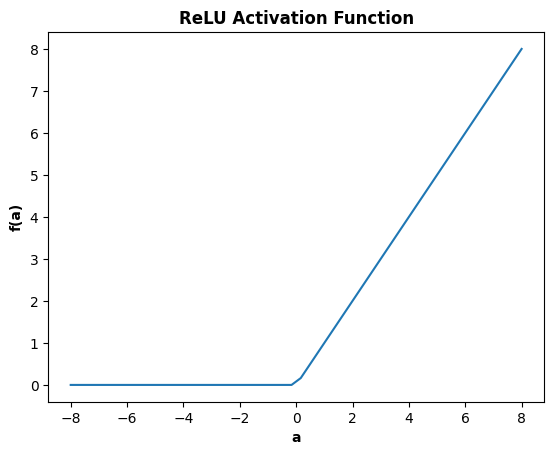

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def relu(a):
    z=[]
    for i in a:
        if i<0:
            z.append(0)
        else:
            z.append(i)
    return z

a = np.linspace(-8, 8)
plt.plot(a, relu(a))
plt.title('ReLU Activation Function', fontweight='bold')
plt.xlabel("a", fontweight='bold')
plt.ylabel("f(a)", fontweight='bold')
plt.show()


#### tanh Activation function

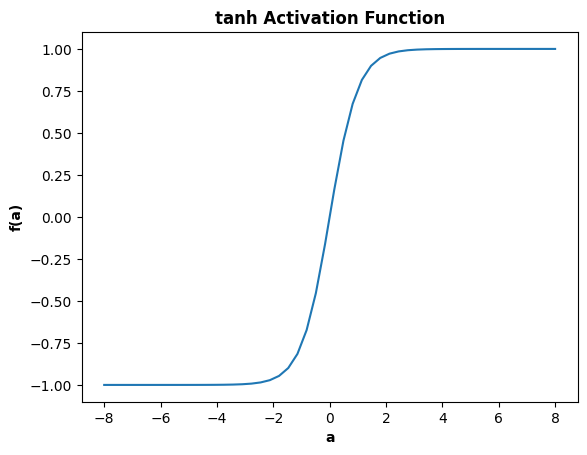

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def tanh(a):
    return np.tanh(a)
a = np.linspace(-8, 8)
plt.plot(a, tanh(a))
plt.title('tanh Activation Function', fontweight='bold')
plt.xlabel("a", fontweight='bold')
plt.ylabel("f(a)", fontweight='bold')
plt.show()

#### Leaky ReLU Activation Function

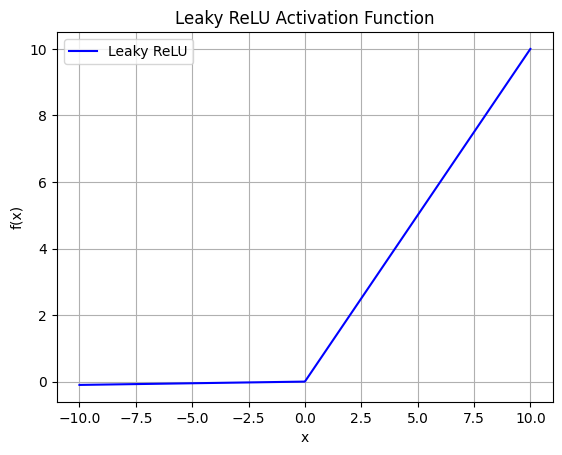

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Leaky ReLU activation function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Generate values for x
x = np.linspace(-10, 10, 1000)

# Apply the Leaky ReLU activation function
y = leaky_relu(x)

# Plot the result
plt.plot(x, y, label='Leaky ReLU', color='blue')
plt.title('Leaky ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


#### Python Code to Display SoftMax Activation Function

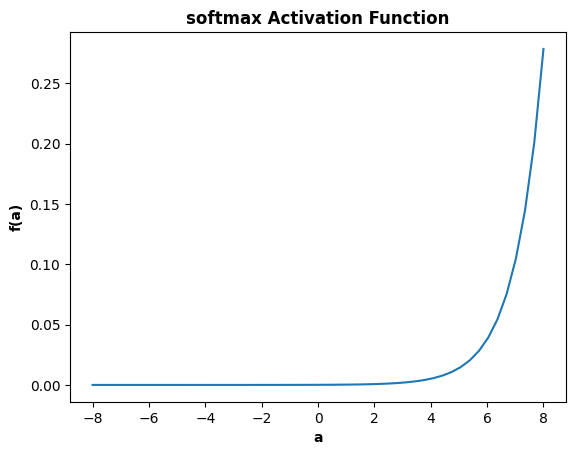

In [11]:
import numpy as np
import matplotlib.pyplot as plt
def softmax(a):
    return np.exp(a) / np.sum(np.exp(a), axis=0)
a = np.linspace(-8, 8)
plt.plot(a, softmax(a))
plt.title('softmax Activation Function',
fontweight='bold')
plt.xlabel("a", fontweight='bold')
plt.ylabel("f(a)", fontweight='bold')
plt.show()